https://media.neliti.com/media/publications/100644-ID-analisis-regresi-linier-piecewise-dua-se.pdf

In [ ]:
import pandas as pd 
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memanggil data 
data_products=pd.read_csv('/content/drive/MyDrive/Folder tanpa nama/inventory_items.csv')

# Melihat jumlah baris dan kolom
data_products.shape

(487394, 12)

In [ ]:
data_events=pd.read_csv('/content/drive/MyDrive/Folder tanpa nama/events.csv')

# Melihat jumlah baris dan kolom
data_events.shape

(2418734, 13)

In [ ]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ids                             487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   costs                           487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

In [ ]:
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418734 entries, 0 to 2418733
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 239.9+ MB


In [ ]:
with pd.option_context("display.max_columns", None):
    display(data_products.head())

,ids,product_id,created_at,sold_at,costs,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Allegra K,25.0,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Allegra K,25.0,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Allegra K,25.0,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Allegra K,25.0,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Allegra K,25.0,Men,22811EE19846217512507785E74D12CC,3


In [ ]:
data_products.isnull().sum()

ids                                    0
product_id                             0
created_at                             0
sold_at                           306886
costs                                  0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [ ]:
data_events.isnull().sum()

id                       0
user_id            1125498
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23862
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [ ]:
data_products['product_brand'] = data_products['product_brand'].fillna(data_products['product_brand'].mode()[0])

In [ ]:
data_products['product_name'] = data_products['product_name'].fillna(data_products['product_name'].mode()[0])

In [ ]:
data_events['city'] = data_events['city'].fillna(data_events['city'].mode()[0])

In [ ]:
data_products.isnull().sum()

ids                                    0
product_id                             0
created_at                             0
sold_at                           306886
costs                                  0
product_category                       0
product_name                           0
product_brand                          0
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [ ]:
data_events.isnull().sum()

id                       0
user_id            1125498
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                     0
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [ ]:
data_products.describe()

,ids,product_id,costs,product_retail_price,product_distribution_center_id
count,487394.000000,487394.000000,487394.000000,487394.000000,487394.000000
mean,243697.500000,15292.257424,28.746374,59.772834,4.992101
std,140698.672888,8408.118539,30.629290,65.871768,2.895917
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121849.250000,8047.000000,11.394300,24.780001,2.000000
50%,243697.500000,16032.000000,19.944301,39.990002,5.000000
75%,365545.750000,22558.000000,34.698691,69.949997,8.000000
max,487394.000000,29120.000000,557.151002,999.000000,10.000000


In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

<Figure size 1080x432 with 0 Axes>

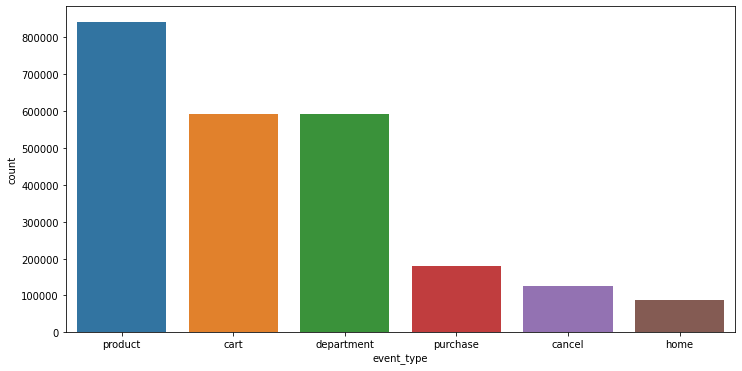

In [ ]:
plt.figure(figsize=(15,6))
plot_count(x="event_type", data=data_events)

<Figure size 1080x432 with 0 Axes>

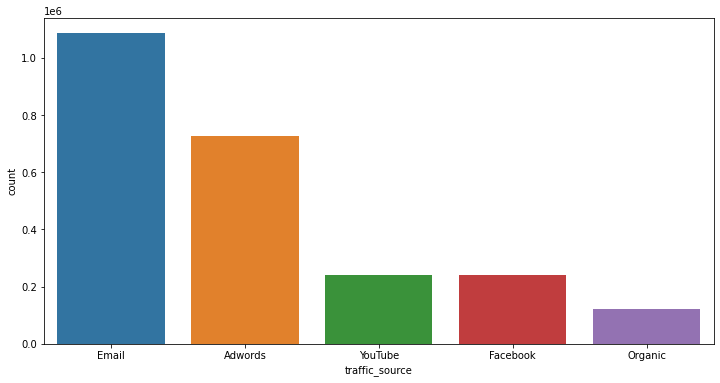

In [ ]:
plt.figure(figsize=(15,6))
plot_count(x="traffic_source", data=data_events)

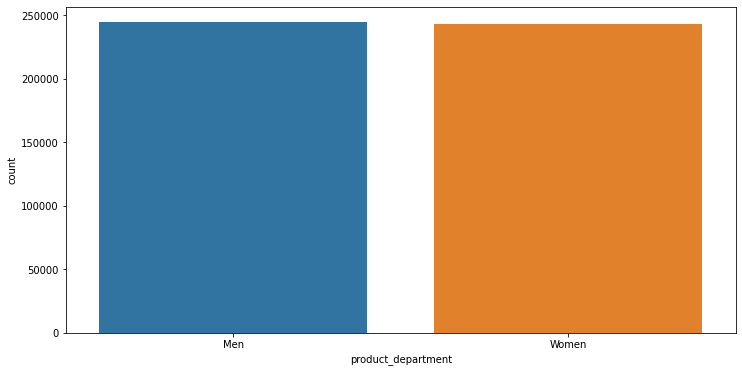

In [ ]:
plot_count(x="product_department", data=data_products)

<Figure size 1080x432 with 0 Axes>

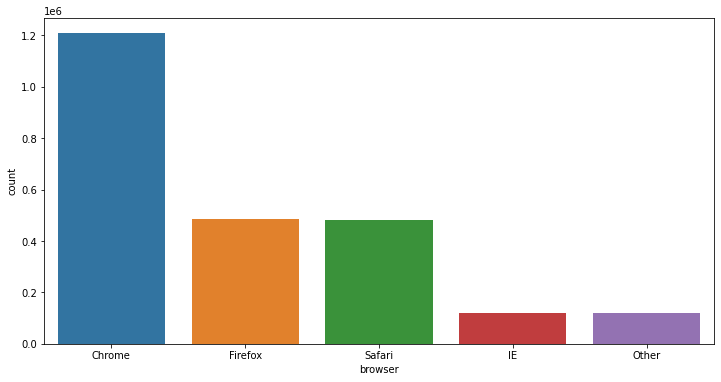

In [ ]:
plt.figure(figsize=(15,6))
plot_count(x="browser", data=data_events)

In [ ]:
data_products.drop(['ids', 'product_id', 'product_distribution_center_id'],  axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


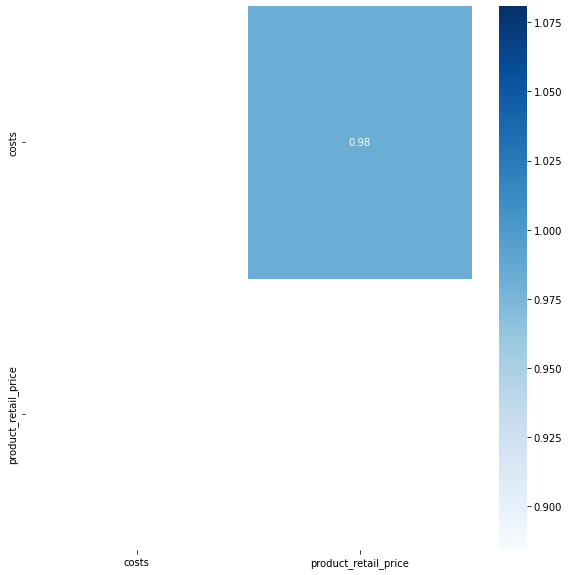

In [ ]:
# Cek Korelasi antara kolom di data kita
# korelasi mengecek nilai diatas 0.75 atau min 0.75
corr_matrix = data_products.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

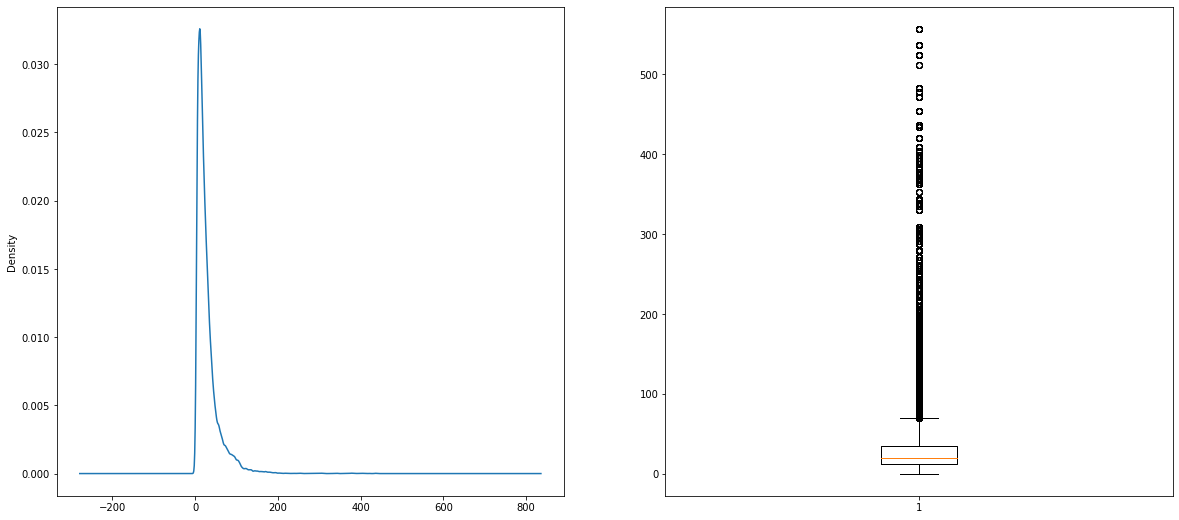

In [ ]:
f = plt.figure(figsize=(20,9))
f.add_subplot(1,2,1)
data_products['costs'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_products['costs'])
plt.show()

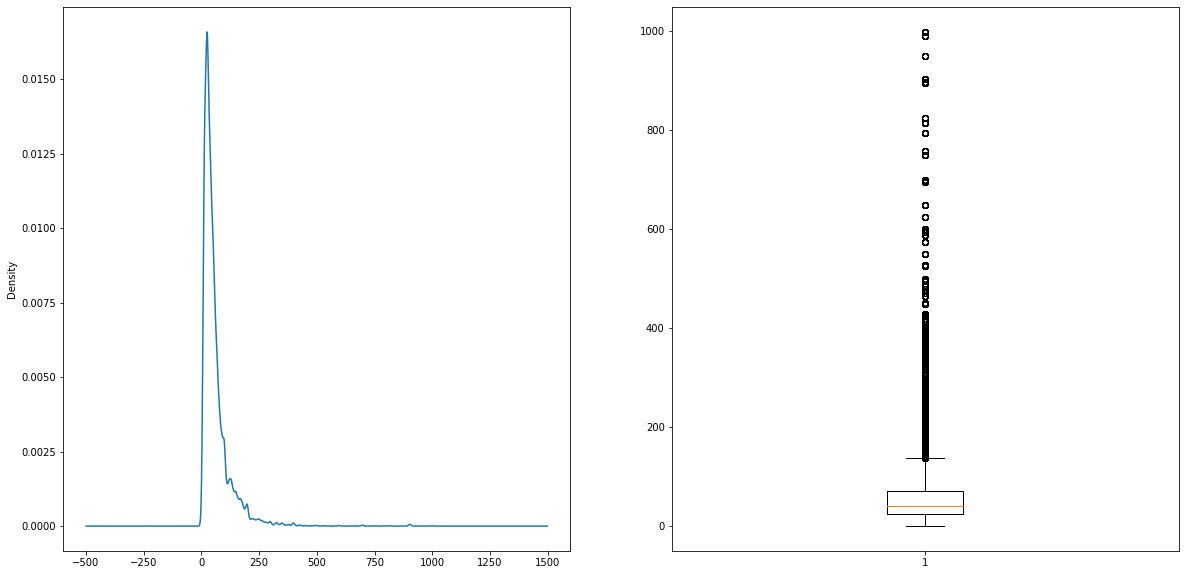

In [ ]:
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2,1)
data_products['product_retail_price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_products['product_retail_price'])
plt.show()

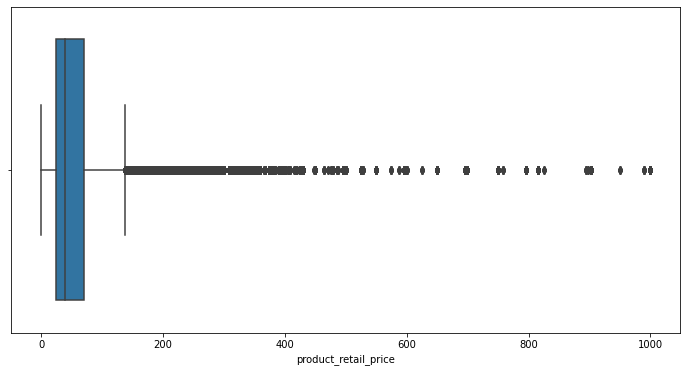

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="product_retail_price", data=data_products)
plt.show()

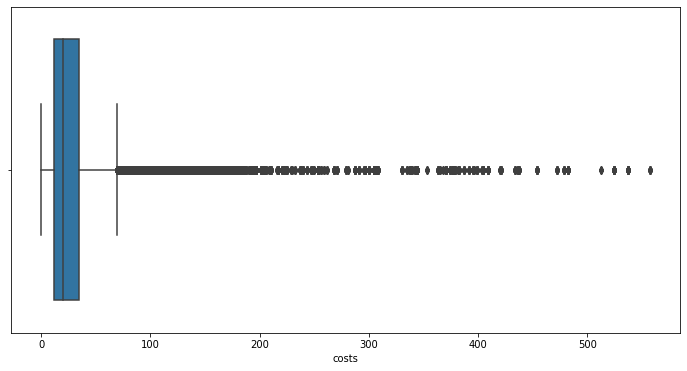

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="costs", data=data_products)
plt.show()

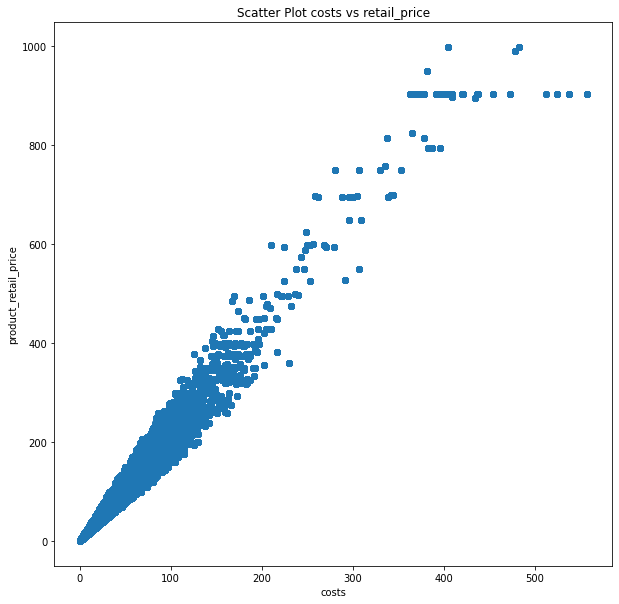

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_products['costs'], data_products['product_retail_price'])
plt.xlabel('costs')
plt.ylabel('product_retail_price')
plt.title('Scatter Plot costs vs retail_price')
plt.show()

Bivariate analysis costs & product_retail_price

In [ ]:
data_products.corr()

,ids,product_id,costs,product_retail_price,product_distribution_center_id
ids,1.000000,-0.002393,-0.002823,-0.003294,0.004094
product_id,-0.002393,1.000000,-0.008774,-0.001736,0.018531
costs,-0.002823,-0.008774,1.000000,0.982524,0.005684
product_retail_price,-0.003294,-0.001736,0.982524,1.000000,-0.007425
product_distribution_center_id,0.004094,0.018531,0.005684,-0.007425,1.000000


In [ ]:
x = data_products['costs'].values.reshape(-1,1)
y = data_products['product_retail_price'].values.reshape(-1,1)

membuat variabel x dan y, variabel independen = costs, variabel dependen = product_retail_price

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

setelah itu, split data kita menjadi training and testing dengan porsi 80:20.

In [ ]:
lin_reg = LinearRegression()

bikin object linear regresi.

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

selanjutnya, training the model menggunakan training data yang sudah displit sebelumnya.

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[2.11343838]]
[-0.97953082]


cari tau nilai slope/koefisien (m) dan intercept (b). diketahui nilai 
m = 2.11274166, dan nilai b = -0.96364073

In [ ]:
# y=m*x+b
2.11334115*14+-0.97953082

28.60724528

mencoba hasil prediksi menggunakan rumus y=m*x+b dengan nilai costs = 14$

In [ ]:
lin_reg.score(x_test, y_test)

0.9645685630434514

model kita mendapatkan accuracy score 96%

Text(0.5, 1.0, 'Plot costs vs retail_price')

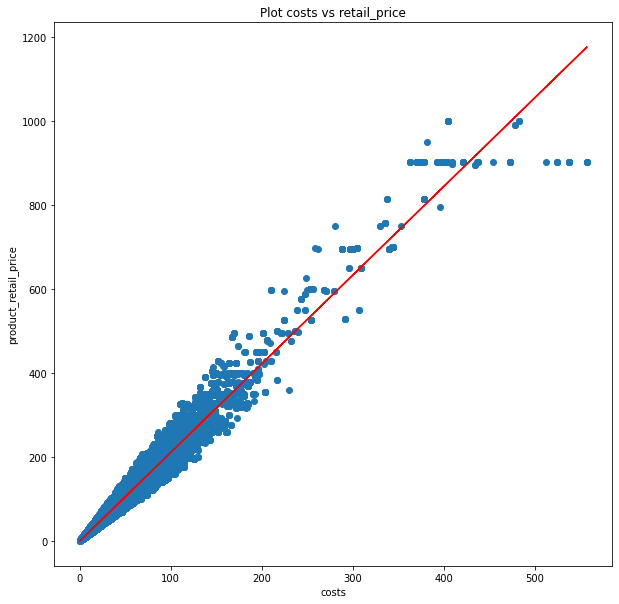

In [ ]:
plt.figure(figsize=(10,10))
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('costs')
plt.ylabel('product_retail_price')
plt.title('Plot costs vs retail_price')

In [ ]:
lin_reg.predict([[14]])

array([[28.6086065]])

In [ ]:
lin_reg.predict([[400]])

array([[844.39582119]])

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_prediksi)

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_prediksi)

In [ ]:
print('r square :',rsq)

r square : 0.9645685630434514


nilai dari r kuadrat mendekati 1